<a href="https://colab.research.google.com/github/aholloman79/A-Primer-on-Scientific-Programming-with-Python/blob/master/Exploring_Python_Splines_for_Healthcare_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

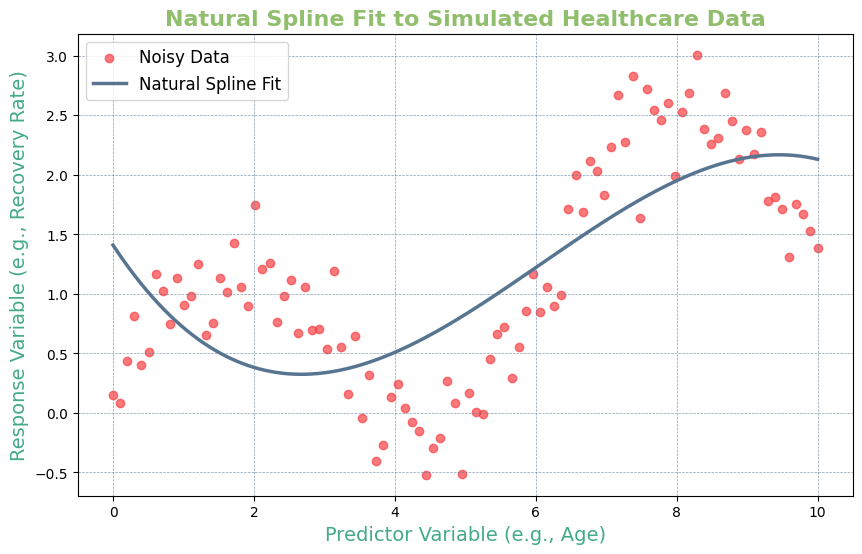

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from patsy import dmatrix
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)
x = np.linspace(0, 10, 100)
y = np.sin(x) + 0.2 * x + np.random.normal(scale=0.3, size=len(x))

# Create a natural spline basis for the predictor variable
spline_basis = dmatrix("bs(x, df=4, include_intercept=True)", {"x": x}, return_type='dataframe')

# Fit the linear regression model using the spline basis
model = LinearRegression()
model.fit(spline_basis, y)

# Create a new spline basis for predictions with consistent feature names
x_fine = np.linspace(0, 10, 500)
spline_basis_fine = dmatrix(
    "bs(x, df=4, include_intercept=True)",  # Keep the same formula
    {"x": x_fine},  # Use the same variable name as during fitting
    return_type='dataframe'
)
y_fine = model.predict(spline_basis_fine)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='#F94144', alpha=0.7, label='Noisy Data')
plt.plot(x_fine, y_fine, color='#577590', linewidth=2.5, label='Natural Spline Fit')
plt.title('Natural Spline Fit to Simulated Healthcare Data', fontsize=16, fontweight='bold', color='#90BE6D')
plt.xlabel('Predictor Variable (e.g., Age)', fontsize=14, color='#43AA8B')
plt.ylabel('Response Variable (e.g., Recovery Rate)', fontsize=14, color='#43AA8B')
plt.legend(fontsize=12)
plt.grid(color='#577590', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()
